In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Historical_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

In [ ]:
df.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [ ]:
df.columns

Index(['customer_id', 'customer_age', 'job_type', 'marital', 'education',
       'default', 'balance', 'housing_loan', 'personal_loan',
       'communication_type', 'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [ ]:
categorical_col=df.select_dtypes(include=['object']).columns
categorical_col

Index(['customer_id', 'job_type', 'marital', 'education', 'default',
       'housing_loan', 'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

In [ ]:
numerical_col=df.select_dtypes(include=['float64','int64']).columns
numerical_col

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'term_deposit_subscribed'],
      dtype='object')

In [ ]:
df.isna().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_Data

,Total,Percent
customer_age,477,1.997487
balance,277,1.159966
personal_loan,113,0.473199
marital,107,0.448074
num_contacts_in_campaign,96,0.402010
day_of_month,0,0.000000
prev_campaign_outcome,0,0.000000
num_contacts_prev_campaign,0,0.000000
last_contact_duration,0,0.000000
month,0,0.000000


In [ ]:
df['customer_age']=df['customer_age'].fillna(df['customer_age'].mode()[0])
df['balance']=df['balance'].fillna(df['balance'].mean())
df['personal_loan']=df['personal_loan'].fillna(df['personal_loan'].mode()[0])
df['marital']=df['marital'].fillna(df['marital'].mode()[0])
df['num_contacts_in_campaign']=df['num_contacts_in_campaign'].fillna(df['num_contacts_in_campaign'].mean())

In [ ]:
df['month'].value_counts()

may    7331
jul    3615
aug    3260
jun    2801
nov    2104
apr    1575
feb    1381
jan     731
oct     389
sep     319
mar     261
dec     113
Name: month, dtype: int64

In [ ]:
df['day_of_month'].value_counts()

20    1437
18    1224
21    1059
6     1040
17    1030
5      991
7      972
14     962
8      960
28     938
19     927
29     926
15     906
12     855
30     829
11     824
13     821
9      818
4      766
16     756
2      648
3      594
27     579
26     539
23     513
22     490
25     435
31     360
10     263
24     237
1      181
Name: day_of_month, dtype: int64

In [ ]:
df2=df[df['term_deposit_subscribed']==1]

In [ ]:
df2['month'].value_counts()

may    429
aug    315
jul    281
apr    274
jun    256
feb    212
nov    195
oct    166
sep    155
mar    135
jan     68
dec     50
Name: month, dtype: int64

In [ ]:
df2['day_of_month'].value_counts()

30    143
15    116
13    115
12    111
5     108
18    107
3      99
4      99
21     97
20     96
16     95
9      92
2      91
11     90
14     88
17     86
8      86
6      82
27     81
22     78
7      75
29     65
25     62
28     59
26     59
10     57
23     52
19     50
1      47
31     26
24     24
Name: day_of_month, dtype: int64

In [ ]:
df['job_type'].value_counts()

blue-collar      5167
management       5006
technician       3978
admin.           2717
services         2224
retired          1176
self-employed     845
entrepreneur      773
unemployed        675
housemaid         663
student           502
unknown           154
Name: job_type, dtype: int64

In [ ]:
df['job_type']=df['job_type'].replace('unknown',"UNKNOWN")


In [ ]:
df['job_type'].value_counts()

blue-collar      5167
management       5006
technician       3978
admin.           2717
services         2224
retired          1176
self-employed     845
entrepreneur      773
unemployed        675
housemaid         663
student           502
UNKNOWN           154
Name: job_type, dtype: int64

In [ ]:
df['education']=df['education'].replace('unknown','UNKNOWN')
df['education']

0        secondary
1          primary
2          primary
3         tertiary
4        secondary
           ...    
23875    secondary
23876     tertiary
23877      primary
23878    secondary
23879     tertiary
Name: education, Length: 23880, dtype: object

In [ ]:
df['communication_type']=df['communication_type'].replace('unknown',"UNKNOWN")
df['communication_type'].value_counts()

cellular     15486
UNKNOWN       6892
telephone     1502
Name: communication_type, dtype: int64

In [ ]:
df.corr()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed
customer_age,1.000000,0.105866,-0.014368,-0.090574,0.007390,-0.003991,0.031996
balance,0.105866,1.000000,0.004343,-0.096397,-0.018092,0.011196,0.052716
day_of_month,-0.014368,0.004343,1.000000,-0.208932,0.164493,-0.044913,-0.024477
last_contact_duration,-0.090574,-0.096397,-0.208932,1.000000,-0.068336,0.037976,-0.019215
num_contacts_in_campaign,0.007390,-0.018092,0.164493,-0.068336,1.000000,-0.029702,-0.071062
num_contacts_prev_campaign,-0.003991,0.011196,-0.044913,0.037976,-0.029702,1.000000,0.084544
term_deposit_subscribed,0.031996,0.052716,-0.024477,-0.019215,-0.071062,0.084544,1.000000


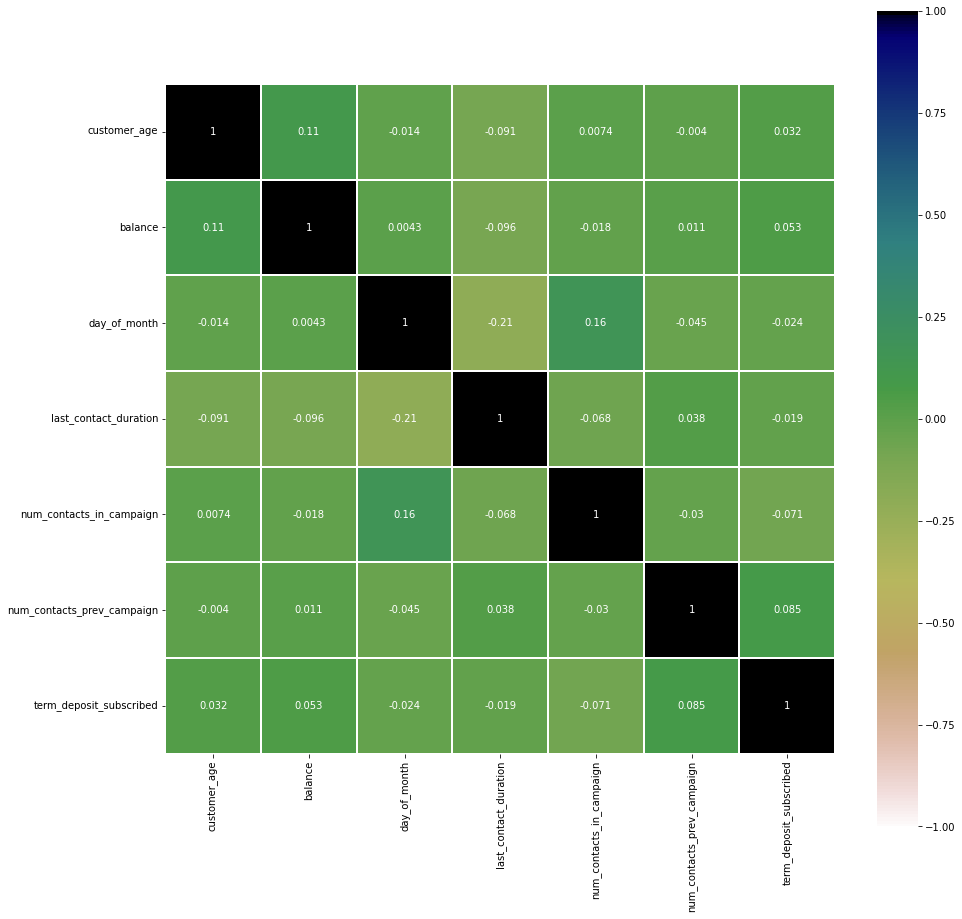

In [ ]:
plt.figure(figsize=[15, 15])
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in categorical_col:
  df[col]=labelencoder.fit_transform(df[col])
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  int64  
 1   customer_age                23880 non-null  float64
 2   job_type                    23880 non-null  int64  
 3   marital                     23880 non-null  int64  
 4   education                   23880 non-null  int64  
 5   default                     23880 non-null  int64  
 6   balance                     23880 non-null  float64
 7   housing_loan                23880 non-null  int64  
 8   personal_loan               23880 non-null  int64  
 9   communication_type          23880 non-null  int64  
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  int64  
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    238

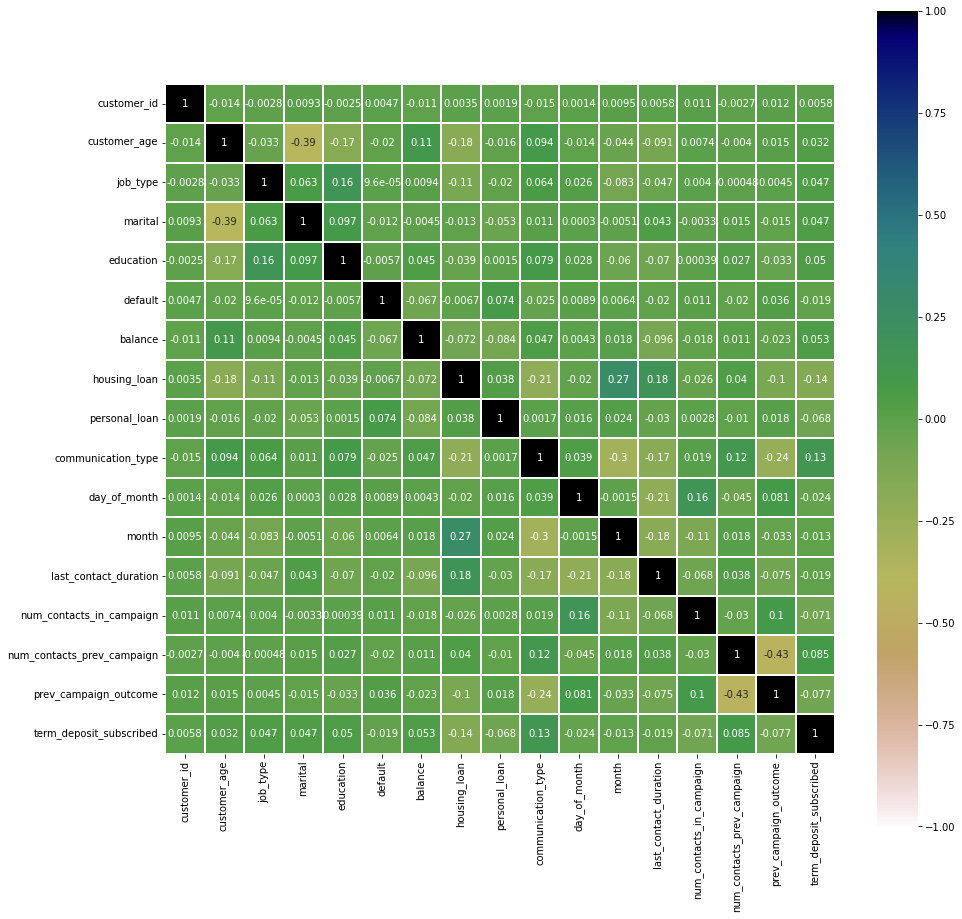

In [ ]:
plt.figure(figsize=[15, 15])
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)

In [ ]:
df_new=pd.read_csv('/content/New_customer_list_data.csv')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7767 non-null   object 
 1   customer_age                7625 non-null   float64
 2   job_type                    7767 non-null   object 
 3   marital                     7724 non-null   object 
 4   education                   7767 non-null   object 
 5   default                     7767 non-null   object 
 6   balance                     7645 non-null   float64
 7   housing_loan                7767 non-null   object 
 8   personal_loan               7731 non-null   object 
 9   communication_type          7767 non-null   object 
 10  last_contact_duration       7767 non-null   int64  
 11  day_of_month                7767 non-null   int64  
 12  month                       7767 non-null   object 
 13  num_contacts_in_campaign    7751 

In [ ]:
df_new.isna().sum()

customer_id                     0
customer_age                  142
job_type                        0
marital                        43
education                       0
default                         0
balance                       122
housing_loan                    0
personal_loan                  36
communication_type              0
last_contact_duration           0
day_of_month                    0
month                           0
num_contacts_in_campaign       16
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

In [ ]:
df_new['customer_age']=df_new['customer_age'].fillna(df_new['customer_age'].mode()[0])
df_new['balance']=df_new['balance'].fillna(df_new['balance'].mean())
df_new['personal_loan']=df_new['personal_loan'].fillna(df_new['personal_loan'].mode()[0])
df_new['marital']=df_new['marital'].fillna(df_new['marital'].mode()[0])
df_new['num_contacts_in_campaign']=df_new['num_contacts_in_campaign'].fillna(df_new['num_contacts_in_campaign'].mean())

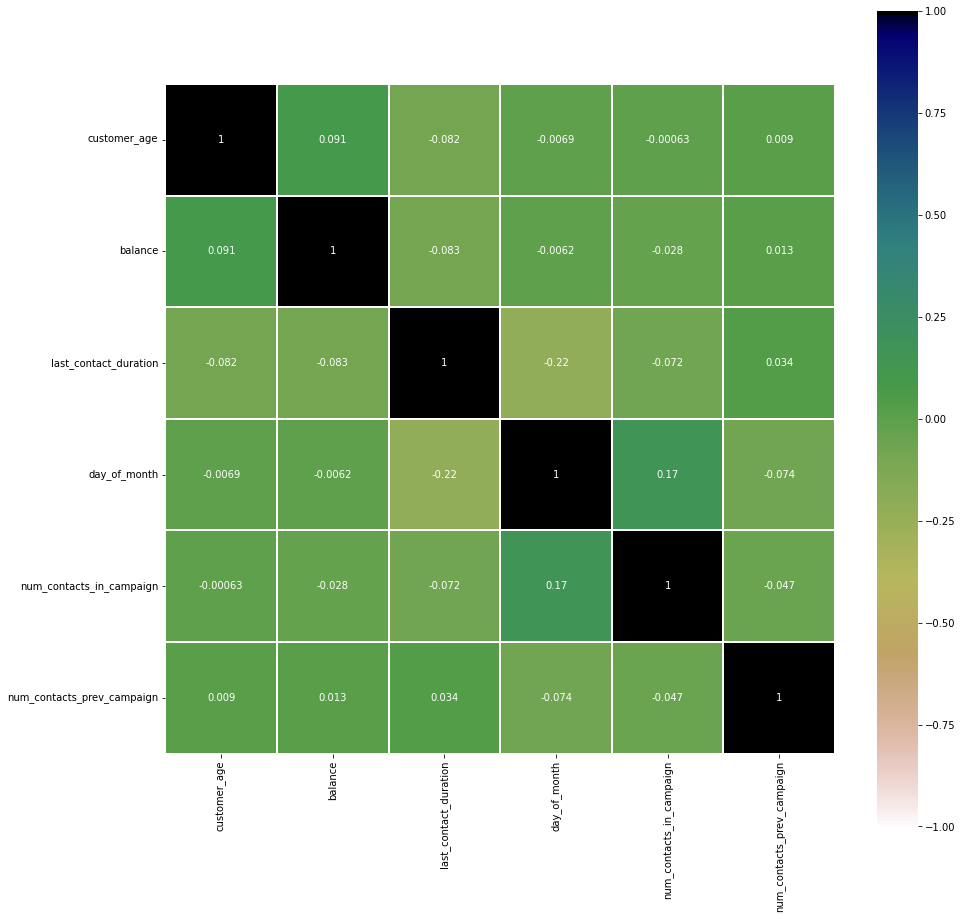

In [ ]:
plt.figure(figsize=[15, 15])
sns.heatmap(data=df_new.corr(), vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)

In [ ]:
df_new['job_type']=df_new['job_type'].replace('unknown',"UNKNOWN")
df_new['job_type'].value_counts()

management       1660
blue-collar      1649
technician       1242
admin.            910
services          699
retired           415
self-employed     266
entrepreneur      264
housemaid         230
unemployed        226
student           161
UNKNOWN            45
Name: job_type, dtype: int64

In [ ]:
df_new['education']=df_new['education'].replace('unknown','UNKNOWN')
df_new['education'].value_counts()

secondary    3917
tertiary     2328
primary      1216
UNKNOWN       306
Name: education, dtype: int64

In [ ]:
df_new['communication_type']=df_new['communication_type'].replace('unknown','UNKNOWN')
df_new['communication_type'].value_counts()

cellular     4994
UNKNOWN      2259
telephone     514
Name: communication_type, dtype: int64

In [ ]:
categorical_col_2=df_new.select_dtypes(include=['object']).columns
categorical_col_2

Index(['customer_id', 'job_type', 'marital', 'education', 'default',
       'housing_loan', 'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in categorical_col_2:
  df_new[col]=labelencoder.fit_transform(df_new[col])
df_new.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7767 non-null   int64  
 1   customer_age                7767 non-null   float64
 2   job_type                    7767 non-null   int64  
 3   marital                     7767 non-null   int64  
 4   education                   7767 non-null   int64  
 5   default                     7767 non-null   int64  
 6   balance                     7767 non-null   float64
 7   housing_loan                7767 non-null   int64  
 8   personal_loan               7767 non-null   int64  
 9   communication_type          7767 non-null   int64  
 10  last_contact_duration       7767 non-null   int64  
 11  day_of_month                7767 non-null   int64  
 12  month                       7767 non-null   int64  
 13  num_contacts_in_campaign    7767 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
Y=df['term_deposit_subscribed']
Y=pd.DataFrame(Y)

X=df.drop(['term_deposit_subscribed'],axis=1)
X=pd.DataFrame(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,Y)

y_pred1 = lr.predict_proba(df_new)
y_pred1=pd.DataFrame(y_pred1)
y_pred=lr.predict(df_new)
y_pred=pd.DataFrame(y_pred)
print(y_pred)
print(y_pred1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
7762  0
7763  0
7764  0
7765  0
7766  0

[7767 rows x 1 columns]
             0         1
0     0.999902  0.000098
1     0.999893  0.000107
2     0.999876  0.000124
3     0.999867  0.000133
4     0.999180  0.000820
...        ...       ...
7762  0.999671  0.000329
7763  0.998840  0.001160
7764  0.999234  0.000766
7765  0.999913  0.000087
7766  0.999884  0.000116

[7767 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be rai

In [ ]:
y_pred.to_csv('pred.csv',index=False)
y_pred1.to_csv('pred_probabilties.csv',index=False)

In [ ]:
y_pred.value_counts()


0    7767
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

In [ ]:
y_res=pd.DataFrame(y_res)


In [ ]:
y_res['term_deposit_subscribed'].value_counts()

0    21344
1    21344
Name: term_deposit_subscribed, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_res,y_res)

y_pred1 = lr.predict_proba(df_new)
y_pred1=pd.DataFrame(y_pred1)
y_pred=lr.predict(df_new)
y_pred=pd.DataFrame(y_pred)
print(y_pred)
print(y_pred1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      0
0     0
1     0
2     0
3     0
4     0
...  ..
7762  0
7763  0
7764  0
7765  0
7766  0

[7767 rows x 1 columns]
             0         1
0     0.999782  0.000218
1     0.998013  0.001987
2     0.999500  0.000500
3     0.999280  0.000720
4     0.997044  0.002956
...        ...       ...
7762  0.997600  0.002400
7763  0.975078  0.024922
7764  0.997143  0.002857
7765  0.999727  0.000273
7766  0.999574  0.000426

[7767 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be rai

In [ ]:
y_pred.to_csv('pred_2.csv',index=False)
y_pred1.to_csv('pred_probabilties_2.csv',index=False)

In [ ]:
y_pred.value_counts()

0    7764
1       3
dtype: int64